In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
import math
def findDistance(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [2]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    
    resultant = pose.process(image_in_RGB)

    if resultant.pose_landmarks and draw:    

        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

    if display:
        
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
        plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:
    
        return original_image, results

In [8]:
# Here we will read our image from the specified path to detect the pose
image_path = 'temp.jpg'
output = cv2.imread(image_path)

image_in_RGB = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    
resultant = pose_image.process(image_in_RGB)

print(resultant)
# mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
#                             connections=mp_pose.POSE_CONNECTIONS,
#                             landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
#                                                                         thickness=3, circle_radius=3),
#                             connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
#                                                                         thickness=2, circle_radius=2))

# detectPose(output, pose_image, draw=True, display=True)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [10]:
resultant.pose_landmarks

landmark {
  x: 0.5270673632621765
  y: 0.15138906240463257
  z: -0.5347452759742737
  visibility: 0.9999668598175049
}
landmark {
  x: 0.5389501452445984
  y: 0.12098627537488937
  z: -0.510905921459198
  visibility: 0.9999326467514038
}
landmark {
  x: 0.5466979742050171
  y: 0.11957186460494995
  z: -0.5110517144203186
  visibility: 0.9999290704727173
}
landmark {
  x: 0.5533350110054016
  y: 0.11863929033279419
  z: -0.5111666917800903
  visibility: 0.999921441078186
}
landmark {
  x: 0.5176079869270325
  y: 0.12294274568557739
  z: -0.5101010799407959
  visibility: 0.9999321699142456
}
landmark {
  x: 0.5108680725097656
  y: 0.12302713841199875
  z: -0.5101308822631836
  visibility: 0.9999278783798218
}
landmark {
  x: 0.5047355890274048
  y: 0.12374532222747803
  z: -0.5102486610412598
  visibility: 0.9999195337295532
}
landmark {
  x: 0.5648379325866699
  y: 0.12678885459899902
  z: -0.33377549052238464
  visibility: 0.9999215602874756
}
landmark {
  x: 0.5007311701774597
  y: 0

In [12]:
keypoints = []
for data_point in resultant.pose_landmarks.landmark:
    keypoints.append({
                         'X': data_point.x,
                         'Y': data_point.y,
                         'Z': data_point.z,
                         'Visibility': data_point.visibility,
                         })

(532, 798)

In [19]:

test_coord = (0.5,0.5)
SCREEN_DIMENSIONS = image_in_RGB.shape[:-1]


def to_pixel_coords(relative_coords):
    return tuple(round(coord * dimension) for coord, dimension in zip(relative_coords, SCREEN_DIMENSIONS))


print(to_pixel_coords(test_coord)) # prints (960, 324)


(266, 399)


In [21]:
right_shoulder = (keypoints[11]['X'],keypoints[11]['Y'])
left_shoulder = (keypoints[12]['X'],keypoints[12]['Y'])

right_waist = (keypoints[23]['X'],keypoints[23]['Y'])
left_waist = (keypoints[24]['X'],keypoints[24]['Y'])

In [23]:
print(to_pixel_coords(right_shoulder))

(336, 245)


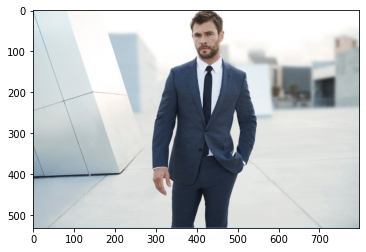

In [24]:
plt.imshow(image_in_RGB)

In [34]:
h, w = image_in_RGB.shape[:2]
lm = resultant.pose_landmarks
lm_pose = mp_pose.PoseLandmark

l_shldr_x = int(lm.landmark[lm_pose.LEFT_SHOULDER].x*w)
l_shldr_y = int(lm.landmark[lm_pose.LEFT_SHOULDER].y*h)

l_shldr = (l_shldr_x,l_shldr_y)

r_shldr_x = int(lm.landmark[lm_pose.RIGHT_SHOULDER].x*w)
r_shldr_y = int(lm.landmark[lm_pose.RIGHT_SHOULDER].y*h)
r_shldr = (r_shldr_x,r_shldr_y)


l_hip_x = int(lm.landmark[lm_pose.LEFT_HIP].x*w)
l_hip_y = int(lm.landmark[lm_pose.LEFT_HIP].y*h)

l_hip = (l_hip_x,l_hip_y)

r_hip_x = int(lm.landmark[lm_pose.RIGHT_HIP].x*w)
r_hip_y = int(lm.landmark[lm_pose.RIGHT_HIP].y*h)
r_hip = (r_hip_x,r_hip_y)




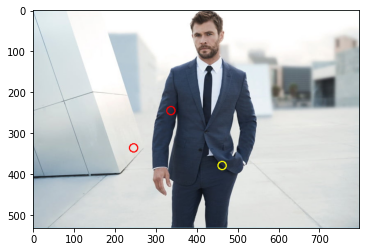

In [37]:
temp = image_in_RGB.copy() 
# Radius of circle
radius = 10
  
# Blue color in BGR
color = (255, 255, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(temp, l_hip, radius, color, thickness)
  
# Displaying the image
plt.imshow(image)